<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura: Data preprocessing</center>

# Challenge S1: Introducción

# Objetivos

En este challenge nos enfrentaremos a un dataset con datos sobre inmuebles en California. Este dataset tiene la particularidad de poseer valores nulos/faltantes y outliers en algunas de sus variables. Por tanto, el objetivo es poner en práctica las técnicas que hemos visto en el worksheet para lidiar con estas situaciones.

# Configuración del entorno

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carga de datos
Esta vez va a ser fácil, vamos a importar los datos de un fichero csv, utilizaremos la función read_csv que nos proporciona la libreria de pandas.

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head(20)

,Unnamed: 0,Unnamed: 0.1,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,15712,15712,-122.44,37.79,52.0,1726.0,384.0,614.0,356.0,3.6812,500000.0,NEAR BAY
1,4119,4119,-118.20,34.14,52.0,3800.0,646.0,1842.0,620.0,5.5524,293900.0,<1H OCEAN
2,15725,15725,-122.44,37.78,44.0,1545.0,334.0,561.0,326.0,3.8750,412500.0,NEAR BAY
3,14616,14616,-117.17,32.80,20.0,2827.0,554.0,1822.0,536.0,3.4706,157600.0,NEAR OCEAN
4,13238,13238,-117.67,34.13,10.0,2846.0,362.0,1221.0,355.0,7.7234,304100.0,INLAND
5,256,256,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,100000.0,NEAR BAY
6,6689,6689,-118.08,34.14,45.0,2923.0,604.0,1903.0,560.0,3.1729,218700.0,INLAND
7,4123,4123,-118.22,34.14,50.0,3657.0,708.0,1725.0,644.0,5.5456,258100.0,<1H OCEAN
8,2287,2287,-119.74,36.79,28.0,2857.0,619.0,1614.0,592.0,2.1573,71400.0,INLAND
9,19689,19689,-121.61,39.13,21.0,1432.0,328.0,933.0,336.0,1.6823,83800.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          500 non-null    int64  
 1   Unnamed: 0.1        500 non-null    int64  
 2   longitude           500 non-null    float64
 3   latitude            500 non-null    float64
 4   housing_median_age  500 non-null    float64
 5   total_rooms         500 non-null    float64
 6   total_bedrooms      445 non-null    float64
 7   population          500 non-null    float64
 8   households          500 non-null    float64
 9   median_income       500 non-null    float64
 10  median_house_value  500 non-null    float64
 11  ocean_proximity     500 non-null    object 
dtypes: float64(9), int64(2), object(1)
memory usage: 47.0+ KB


# Valores nulos

En primer lugar, identifica aquellas columnas que tienen valores nulos/faltantes

In [5]:
df.isnull().sum()
# la columna "total_bedrooms" tiene 55 valores na

Unnamed: 0             0
Unnamed: 0.1           0
longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        55
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

In [6]:
#También lo podemos usar con isna y el resultado es el mismo
df.isna().sum()

Unnamed: 0             0
Unnamed: 0.1           0
longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        55
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

Elige una de estas columnas para probar diferentes estrategias de manejo de valores nulos.

Primero, crea una copia de esta columna utilizando la estrategia de rellenado con la mediana.

In [7]:
#Creamos un df_temp para ir inlcuyendo las columnas nuevas
df_temp = df.copy()
#Calulamos la mediana con la función median de pandas.
median = df_temp.total_bedrooms.median()
print("La mediana de la columna total_bedrooms es : ",median,"\n" )
#Creamos una nueva columna en el df para incluir la columna total_bedrooms_median con la mediana
df_temp["total_bedrooms_median"] = df_temp.total_bedrooms.fillna(median)
df_temp[(df_temp["total_bedrooms_median"]==median) & (df_temp["total_bedrooms"].isna())]


La mediana de la columna total_bedrooms es :  441.0 



,Unnamed: 0,Unnamed: 0.1,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_median
46,4852,4852,-118.31,34.03,47.0,1315.0,NaN,785.0,245.0,1.2300,138400.0,<1H OCEAN,441.0
123,17041,17041,-122.28,37.51,33.0,4719.0,NaN,1980.0,757.0,6.1064,405000.0,NEAR OCEAN,441.0
200,7734,7734,-118.15,33.93,30.0,3096.0,NaN,1676.0,587.0,4.6583,207300.0,<1H OCEAN,441.0
201,3342,3342,-122.62,38.73,21.0,1425.0,NaN,727.0,287.0,2.1474,85300.0,INLAND,441.0
202,1243,1243,-122.13,39.00,23.0,3832.0,NaN,2435.0,747.0,2.2754,59200.0,INLAND,441.0
203,7573,7573,-118.21,33.90,43.0,1810.0,NaN,1335.0,358.0,3.1189,118800.0,<1H OCEAN,441.0
204,8540,8540,-118.36,33.89,27.0,2837.0,NaN,2141.0,648.0,3.1325,215000.0,<1H OCEAN,441.0
205,18642,18642,-121.99,36.98,25.0,2113.0,NaN,1365.0,439.0,4.6484,234600.0,NEAR OCEAN,441.0
206,1821,1821,-122.29,37.92,35.0,583.0,NaN,235.0,84.0,5.9430,288200.0,NEAR BAY,441.0
207,16426,16426,-121.42,38.22,35.0,1507.0,NaN,868.0,283.0,2.0284,96300.0,INLAND,441.0


Segundo, crea una copia de esta columna utilizando la estrategia de rellenado con media aritmética.

In [8]:
#Calulamos la mediana con la función mean de pandas.
mean = df_temp.total_bedrooms.mean()
print("La media de la columna total_bedrooms es : ",mean,"\n" )
#Creamos una nueva columna en el df para incluir la columna total_bedrooms_mean con la media
df_temp["total_bedrooms_mean"] = df_temp.total_bedrooms.fillna(mean)
df_temp[(df_temp["total_bedrooms_mean"] == mean) & (df_temp["total_bedrooms"].isna())]

La media de la columna total_bedrooms es :  559.1483146067416 



,Unnamed: 0,Unnamed: 0.1,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_median,total_bedrooms_mean
46,4852,4852,-118.31,34.03,47.0,1315.0,NaN,785.0,245.0,1.2300,138400.0,<1H OCEAN,441.0,559.148315
123,17041,17041,-122.28,37.51,33.0,4719.0,NaN,1980.0,757.0,6.1064,405000.0,NEAR OCEAN,441.0,559.148315
200,7734,7734,-118.15,33.93,30.0,3096.0,NaN,1676.0,587.0,4.6583,207300.0,<1H OCEAN,441.0,559.148315
201,3342,3342,-122.62,38.73,21.0,1425.0,NaN,727.0,287.0,2.1474,85300.0,INLAND,441.0,559.148315
202,1243,1243,-122.13,39.00,23.0,3832.0,NaN,2435.0,747.0,2.2754,59200.0,INLAND,441.0,559.148315
203,7573,7573,-118.21,33.90,43.0,1810.0,NaN,1335.0,358.0,3.1189,118800.0,<1H OCEAN,441.0,559.148315
204,8540,8540,-118.36,33.89,27.0,2837.0,NaN,2141.0,648.0,3.1325,215000.0,<1H OCEAN,441.0,559.148315
205,18642,18642,-121.99,36.98,25.0,2113.0,NaN,1365.0,439.0,4.6484,234600.0,NEAR OCEAN,441.0,559.148315
206,1821,1821,-122.29,37.92,35.0,583.0,NaN,235.0,84.0,5.9430,288200.0,NEAR BAY,441.0,559.148315
207,16426,16426,-121.42,38.22,35.0,1507.0,NaN,868.0,283.0,2.0284,96300.0,INLAND,441.0,559.148315


Tercero, crea una copia de esta columna utilizando la estrategia de rellenado con valor fijo de 0.

In [9]:
#Creamos una nueva columna en el df para incluir la columna total_bedrooms_mean con la media
df_temp["total_bedrooms_0"] = df_temp.total_bedrooms.fillna(0)
df_temp[(df_temp["total_bedrooms_0"] == 0) & (df_temp["total_bedrooms"].isna())]

,Unnamed: 0,Unnamed: 0.1,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_median,total_bedrooms_mean,total_bedrooms_0
46,4852,4852,-118.31,34.03,47.0,1315.0,NaN,785.0,245.0,1.2300,138400.0,<1H OCEAN,441.0,559.148315,0.0
123,17041,17041,-122.28,37.51,33.0,4719.0,NaN,1980.0,757.0,6.1064,405000.0,NEAR OCEAN,441.0,559.148315,0.0
200,7734,7734,-118.15,33.93,30.0,3096.0,NaN,1676.0,587.0,4.6583,207300.0,<1H OCEAN,441.0,559.148315,0.0
201,3342,3342,-122.62,38.73,21.0,1425.0,NaN,727.0,287.0,2.1474,85300.0,INLAND,441.0,559.148315,0.0
202,1243,1243,-122.13,39.00,23.0,3832.0,NaN,2435.0,747.0,2.2754,59200.0,INLAND,441.0,559.148315,0.0
203,7573,7573,-118.21,33.90,43.0,1810.0,NaN,1335.0,358.0,3.1189,118800.0,<1H OCEAN,441.0,559.148315,0.0
204,8540,8540,-118.36,33.89,27.0,2837.0,NaN,2141.0,648.0,3.1325,215000.0,<1H OCEAN,441.0,559.148315,0.0
205,18642,18642,-121.99,36.98,25.0,2113.0,NaN,1365.0,439.0,4.6484,234600.0,NEAR OCEAN,441.0,559.148315,0.0
206,1821,1821,-122.29,37.92,35.0,583.0,NaN,235.0,84.0,5.9430,288200.0,NEAR BAY,441.0,559.148315,0.0
207,16426,16426,-121.42,38.22,35.0,1507.0,NaN,868.0,283.0,2.0284,96300.0,INLAND,441.0,559.148315,0.0


Cuarto, crea una copia de esta columna utilizando una nueva estrategia de rellenado que tú quieras y **justifica el motivo**.

* Voy a seleccionar el valor de la moda de total_bedrooms.Creo que la moda al ser el valor que más veces se repite, y estar menos afectado por los outliers, como los están media y moda, creo que puede ser el valor más representativo para suistituir los NaN.

In [10]:
#Creamos una nueva columna en el df para incluir la columna total_bedrooms_mmode. En esta columna será el resultado
#de sustituir los NaN por la moda de total_bedrooms.

#Calulamos la moda con la función mode de pandas.
mode = float(df_temp.total_bedrooms.mode())
print("La moda de la columna total_bedrooms es :",mode,"\n" )
#Creamos una nueva columna en el df para incluir la columna total_bedrooms_mode con la moda
df_temp["total_bedrooms_mode"] = df_temp.total_bedrooms.fillna(mode)
df_temp[(df_temp["total_bedrooms_mode"] == mode) & (df_temp["total_bedrooms"].isna())]

La moda de la columna total_bedrooms es : 283.0 



,Unnamed: 0,Unnamed: 0.1,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_median,total_bedrooms_mean,total_bedrooms_0,total_bedrooms_mode
46,4852,4852,-118.31,34.03,47.0,1315.0,NaN,785.0,245.0,1.2300,138400.0,<1H OCEAN,441.0,559.148315,0.0,283.0
123,17041,17041,-122.28,37.51,33.0,4719.0,NaN,1980.0,757.0,6.1064,405000.0,NEAR OCEAN,441.0,559.148315,0.0,283.0
200,7734,7734,-118.15,33.93,30.0,3096.0,NaN,1676.0,587.0,4.6583,207300.0,<1H OCEAN,441.0,559.148315,0.0,283.0
201,3342,3342,-122.62,38.73,21.0,1425.0,NaN,727.0,287.0,2.1474,85300.0,INLAND,441.0,559.148315,0.0,283.0
202,1243,1243,-122.13,39.00,23.0,3832.0,NaN,2435.0,747.0,2.2754,59200.0,INLAND,441.0,559.148315,0.0,283.0
203,7573,7573,-118.21,33.90,43.0,1810.0,NaN,1335.0,358.0,3.1189,118800.0,<1H OCEAN,441.0,559.148315,0.0,283.0
204,8540,8540,-118.36,33.89,27.0,2837.0,NaN,2141.0,648.0,3.1325,215000.0,<1H OCEAN,441.0,559.148315,0.0,283.0
205,18642,18642,-121.99,36.98,25.0,2113.0,NaN,1365.0,439.0,4.6484,234600.0,NEAR OCEAN,441.0,559.148315,0.0,283.0
206,1821,1821,-122.29,37.92,35.0,583.0,NaN,235.0,84.0,5.9430,288200.0,NEAR BAY,441.0,559.148315,0.0,283.0
207,16426,16426,-121.42,38.22,35.0,1507.0,NaN,868.0,283.0,2.0284,96300.0,INLAND,441.0,559.148315,0.0,283.0


Analiza el efecto de estas cuatro estrategias de rellenado con respecto a la variable original con valores nulos:

* ¿Qué diferencias observas en la distribución de valores de las variables rellenadas?
* ¿Cómo crees que pueden afectar los nuevos a algún análisis posterior?
* ¿Con qué estrategia te quedarías?

Vamos a gráficar con un simple diagrama de linea, tanto la columna total_bedrooms como las columnas calculadas con las
distintas estrategias

In [11]:
#Obtenemos los estadisticos

df_temp_total_bedroms=df_temp[["total_bedrooms","total_bedrooms_median","total_bedrooms_mean","total_bedrooms_0","total_bedrooms_mode"]]
df_temp_total_bedroms.describe()

,total_bedrooms,total_bedrooms_median,total_bedrooms_mean,total_bedrooms_0,total_bedrooms_mode
count,445.000000,500.000000,500.000000,500.000000,500.000000
mean,559.148315,546.152000,559.148315,497.642000,528.772000
std,480.997758,455.222689,453.716177,486.341273,461.886326
min,1.000000,1.000000,1.000000,0.000000,1.000000
25%,291.000000,309.000000,309.000000,234.500000,283.000000
50%,441.000000,441.000000,496.000000,400.000000,400.000000
75%,681.000000,630.500000,630.500000,630.500000,630.500000
max,5471.000000,5471.000000,5471.000000,5471.000000,5471.000000


<AxesSubplot:ylabel='Frequency'>

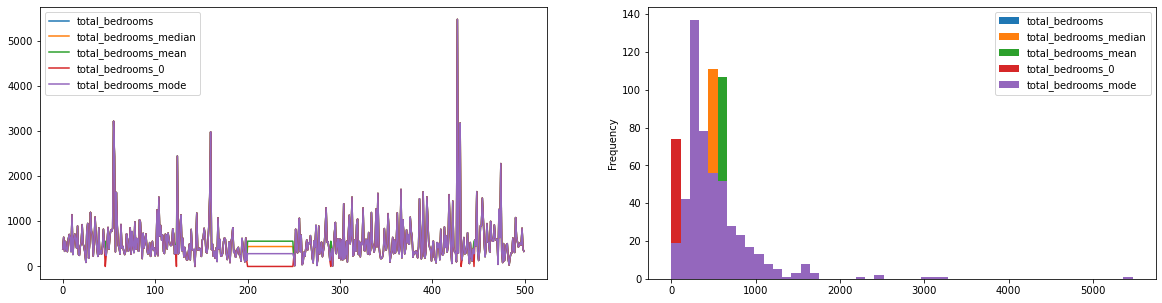

In [12]:
#graficamos total_bedrooms haciendo comparativa gráfica entre todas las estrategias

figure, axs = plt.subplots(1,2, sharey=False, sharex=False)
df_temp_total_bedroms.plot(ax=axs[0], figsize=(20,5))
df_temp_total_bedroms.plot.hist(ax=axs[1],figsize=(20,5),bins=50)

<AxesSubplot:ylabel='Frequency'>

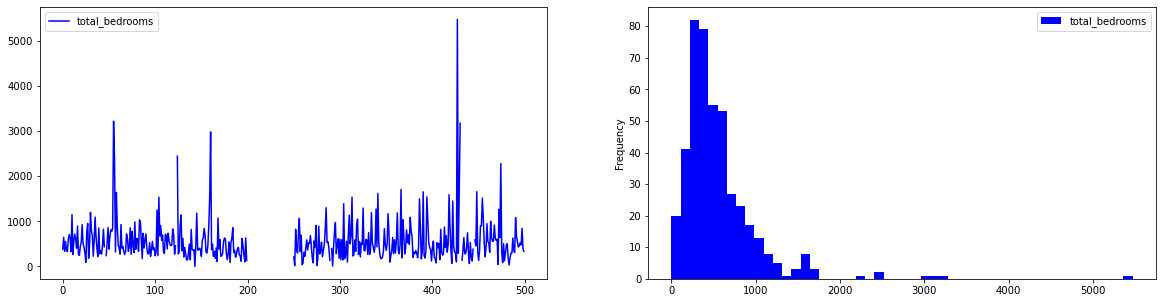

In [13]:
#graficamos total_bedrooms. columna que contiene los nan

df_temp_total_bedroms=df_temp[["total_bedrooms"]]
figure, axs = plt.subplots(1,2, sharey=False, sharex=False)
df_temp_total_bedroms.plot(ax=axs[0], figsize=(20,5),color='blue')
df_temp_total_bedroms.plot.hist(ax=axs[1],figsize=(20,5), color='blue',bins=50)

<AxesSubplot:ylabel='Frequency'>

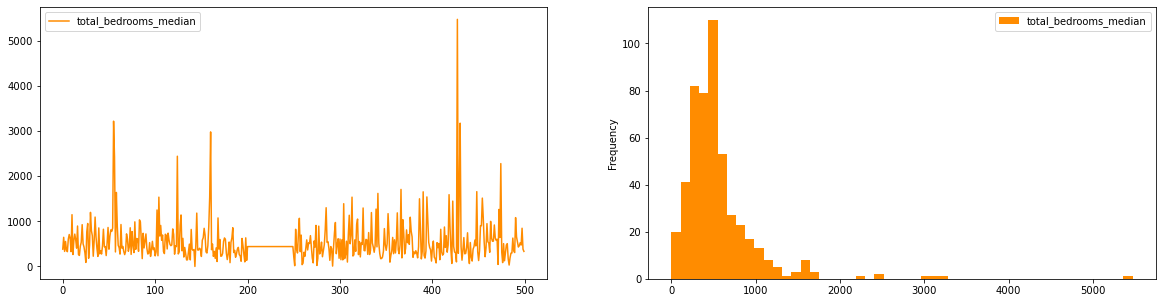

In [14]:
#graficamos total_bedrooms_median. columna que contiene la mediana

df_temp_total_bedroms_median=df_temp[["total_bedrooms_median"]]
figure, axs = plt.subplots(1,2, sharey=False, sharex=False)
df_temp_total_bedroms_median.plot(ax=axs[0], figsize=(20,5),color='DarkOrange')
df_temp_total_bedroms_median.plot.hist(ax=axs[1],figsize=(20,5), color='DarkOrange',bins=50)

<AxesSubplot:ylabel='Frequency'>

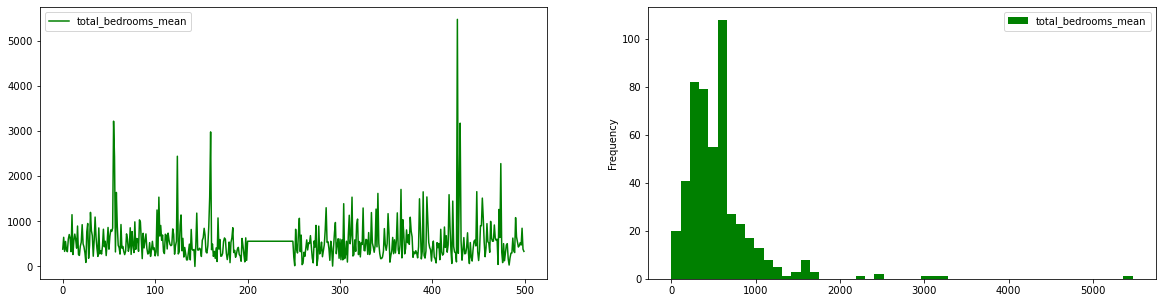

In [15]:
#graficamos total_bedrooms_mean. columna que contiene la media

df_temp_total_bedroms_mean=df_temp[["total_bedrooms_mean"]]
figure, axs = plt.subplots(1,2, sharey=False, sharex=False)
df_temp_total_bedroms_mean.plot(ax=axs[0], figsize=(20,5),color='green')
df_temp_total_bedroms_mean.plot.hist(ax=axs[1],figsize=(20,5), color='green',bins=50)

<AxesSubplot:ylabel='Frequency'>

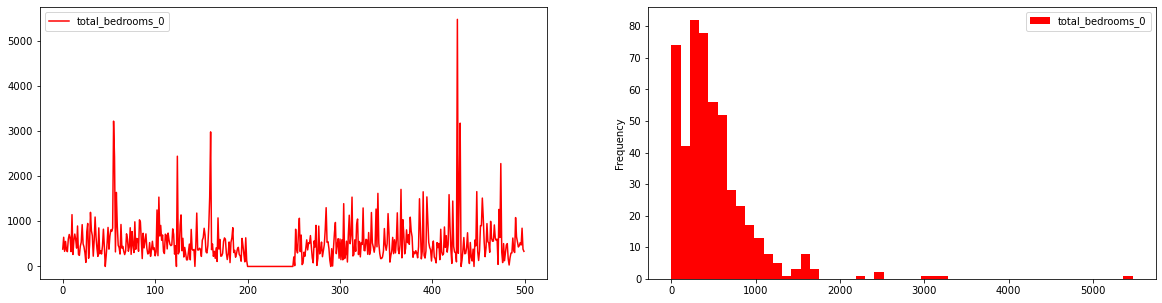

In [16]:
#graficamos total_bedrooms_0. columna que contiene la sustitución de los valores nan por 0

df_temp_total_bedroms_0=df_temp[["total_bedrooms_0"]]
figure, axs = plt.subplots(1,2, sharey=False, sharex=False)
df_temp_total_bedroms_0.plot(ax=axs[0], figsize=(20,5),color='red')
df_temp_total_bedroms_0.plot.hist(ax=axs[1],figsize=(20,5), color='red',bins=50)

<AxesSubplot:ylabel='Frequency'>

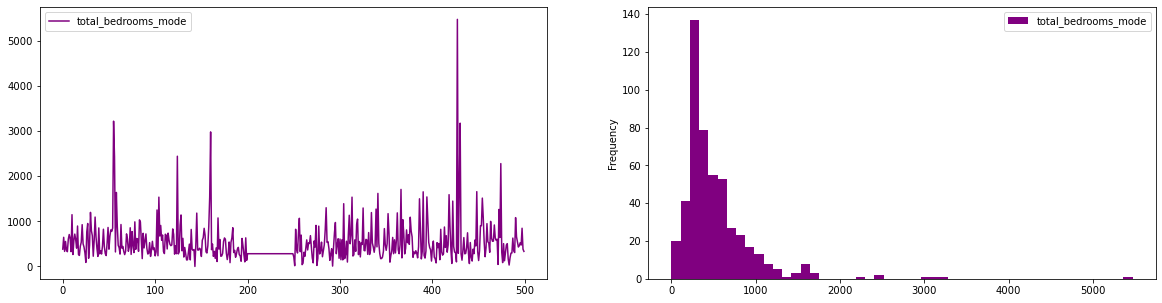

In [17]:
#graficamos total_bedrooms_mode. columna que contiene los valores calculados en base a la moda

df_temp_total_bedroms_mode=df_temp[["total_bedrooms_mode"]]
figure, axs = plt.subplots(1,2, sharey=False, sharex=False)
df_temp_total_bedroms_mode.plot(ax=axs[0], figsize=(20,5),color='purple')
df_temp_total_bedroms_mode.plot.hist(ax=axs[1],figsize=(20,5), color='purple',bins=50)

*Respuestas :*

¿Qué diferencias observas en la distribución de valores de las variables rellenadas?

* Como primera observación se ve que cualquiera de las estrategías de sustitución de los NaN mejora la gráfica ya que no se visulizan cortes en el como pasaba con los NaN, todos los registros representan un dato. 
* Con repecto a los histogramas de frecuencia dependiendo de la estrategía, se ve en el histograma comparativo que dependiendo el valor elegido las frecuencias mayores se concentran:

    * **0** - Aparece un pico al inicio dado que se suman muchos registros al valor O, aunque sigue habiendo frecuncias mayores entorno a la moda y la media.
    * **moda** - Al elegir la moda, 283.0, se ve como la fracuencia máxima de valores se encuentra al inicio del histograma, y luego va en descenso.
    * **media y mediana** : Para ambas estrategias el histograma es muy similar, simplemente que al ser mayor el valor de la media 559.1483146067416 que el de la mediana 441.0, el histograma de la media la mayor frecuencia aparece algo más desplazada a la derecha que el de la mediana.
  
¿Cómo crees que pueden afectar los nuevos a algún análisis posterior?

* Creo que la estrategia del 0 sigue desvirtuando bastante cualquier análisis.
* La estrategía de la media y la mediana y la moda, elegido opcionalmente, los datos están más equilibrados, y los estadisticos principales no se aprecian grandes diferencias.

¿Con qué estrategia te quedarías?

* Considero que en este caso la estragia de selección más acertada es el de la **moda** ya que al ser el valor más común es un valor que no se ve afectado por los valores extremos o outliers como podría ser la media y en menor medida la mediana.
* En cuanto a al estrategía de los 0 en este caso creo que no mejora mucho ya que aunque le damos valor a los registros con NaN y la gráfica no se nos corta, creo que dar valores como la mediana, la media o la moda pueden ser más ajustados a la realidad.

# Outliers

Ahora, vamos a realizar un estudio de outliers sobre nuestro conjunto de datos. 

En primer lugar, ¿se te ocurre alguna forma sencilla de ver que variables pueden contener outliers?

* Una de las opciones más sencillas que se me ocurren es hacer un describe del dataframe fijando los percentiles al 95 y 99 y compararlo con el valor de max, si la diferencia entre los dos valores es mucha claramente en esa columna puede haber outliers

In [18]:
df.describe(percentiles=[.01, .05,.25, .5, .75, .95, .99])

,Unnamed: 0,Unnamed: 0.1,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,445.000000,500.000000,500.000000,500.000000,500.000000
mean,10675.182000,10675.182000,-119.625740,35.727240,28.798000,2782.94600,559.148315,1475.974000,520.900000,3.834080,206314.648000
std,6063.909648,6063.909648,2.007212,2.201662,12.930878,2731.69732,480.997758,1274.850201,433.667547,1.971458,117445.796651
min,30.000000,30.000000,-124.160000,32.650000,1.000000,8.00000,1.000000,13.000000,1.000000,0.499900,32500.000000
1%,233.920000,233.920000,-123.218000,32.719900,4.000000,184.42000,35.960000,84.780000,24.990000,1.063615,53782.000000
5%,1062.550000,1062.550000,-122.572000,32.998000,7.000000,582.55000,121.400000,340.900000,120.900000,1.499430,64660.000000
25%,5419.500000,5419.500000,-121.765000,33.937500,18.000000,1443.25000,291.000000,785.750000,281.750000,2.498050,114275.000000
50%,10912.500000,10912.500000,-118.590000,34.260000,28.000000,2187.50000,441.000000,1195.000000,413.500000,3.388400,178400.000000
75%,16004.750000,16004.750000,-118.030000,37.770000,39.000000,3263.25000,681.000000,1783.250000,629.750000,4.756375,273400.000000
95%,19745.000000,19745.000000,-117.129000,39.181500,52.000000,6714.15000,1299.800000,3566.700000,1259.150000,7.711810,499050.000000


* Vemos que con esta premisa columnas como **total_rooms, total_bedrooms, population, households,** claramente pueden tener outliers

Selecciona una de estas variables y muestra un gráfico en el que sea evidente la presencia del outlier

 * Vamos a seleccionar la variable **population**. El tipo de gráfico a reperesentar será el Boxplot, por ser el más utilizado, aunque no es único, para la detección de outliers

<AxesSubplot:>

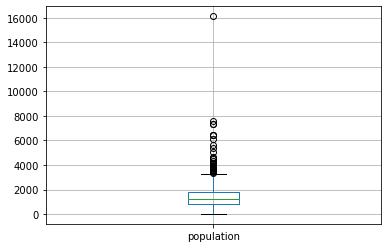

In [19]:
#hacemos una copia del df original

df_oultiers = df.copy()

#pintamos el boxplot para visulizar outliers

df_oultiers.boxplot('population')

* Como se puede apreciar tiene bastates outliers por la parte superior de los "bigotes"

Aplica el método de tukey visto en el Worksheet para filtrar el outlier.

In [20]:
#definimos la función que tukey que nos permite detectar los outliers.

def filtrar_outlier_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    print("[q1=%f, q3=%f, iqr=%f]" % (q1, q3, iqr))
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    print("[floor=%f, ceiling=%f]" % (floor, ceiling))
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [21]:
#invocamos a la función filtrar_outlier_tukey para saber el indice y los valores outliers de la variable total_rooms
outlier_indices, outlier_values = filtrar_outlier_tukey(df_oultiers.population)

[q1=785.750000, q3=1783.250000, iqr=997.500000]
[floor=-710.500000, ceiling=3279.500000]


In [22]:
#visualizamos los indices y los valores de los outliers detectados

print("LOS INDICES DE LOS OUTLIERS SON : \n",outlier_indices,"\n")
print("LOS VALORES DE LOS OUTLIERS SON : \n",outlier_values,"\n")

LOS INDICES DE LOS OUTLIERS SON : 
 [27, 30, 55, 56, 58, 102, 106, 124, 137, 159, 160, 226, 232, 245, 248, 285, 304, 313, 325, 386, 390, 394, 422, 427, 429, 430, 448, 454, 463, 472, 474] 

LOS VALORES DE LOS OUTLIERS SON : 
 [3527.0, 3954.0, 7305.0, 6420.0, 4449.0, 3426.0, 3731.0, 6085.0, 5087.0, 4333.0, 7608.0, 4088.0, 5595.0, 3333.0, 3868.0, 3891.0, 3551.0, 3759.0, 3599.0, 5349.0, 4178.0, 4552.0, 4194.0, 16122.0, 6437.0, 7301.0, 4631.0, 3565.0, 3517.0, 3704.0, 6474.0] 



In [23]:
#una vez que tenemos el indice y los valores los eliminamos siguiendo la misma estrategia del worksheet

for index in outlier_indices:
    df_oultiers.population.at[index] = np.nan

Muestra el mismo gráfico de antes para tu variable sin esos outliers

<AxesSubplot:>

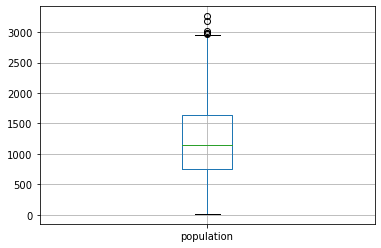

In [24]:
df_oultiers.boxplot('population')

* Observamos que sigue habiendo outliers por que los percentiles y la mediana se han visto recalculados al haber eliminado
los anteriores

Ahora, prueba a ejectuar el mismo método de tukey pero relajando la zona de outlier a $Q_3 + 3 \times IQR$.

In [25]:
#definimos la función que tukey "relajado" que nos permite detectar los ouliers.

def filtrar_outlier_tukey_relajado(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    print("[q1=%f, q3=%f, iqr=%f]" % (q1, q3, iqr))
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 3*iqr #relajamos el indice superior multiplicando el iqr * 3
    print("[floor=%f, ceiling=%f]" % (floor, ceiling))
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [26]:
#hacemos una copia del df original para volver a calcular todo con el nuevo limite

df_oultiers_relajado = df.copy()

#invocamos la función filtrar_outlier_tukey_relajado para saber el indice y
#los valores outliers de la variable total_rooms

outlier_relajado_indices, outlier_relajado_values = filtrar_outlier_tukey_relajado(df_oultiers_relajado.population)

[q1=785.750000, q3=1783.250000, iqr=997.500000]
[floor=-710.500000, ceiling=4775.750000]


In [27]:
#visualizamos los indices y los valores de los outliers detectados

print("LOS INDICES DE LOS OUTLIERS RELAJADOS SON : \n",outlier_relajado_indices,"\n")
print("LOS VALORES DE LOS OUTLIERS RELAJADOS SON : \n",outlier_relajado_values,"\n")

LOS INDICES DE LOS OUTLIERS RELAJADOS SON : 
 [55, 56, 124, 137, 160, 232, 386, 427, 429, 430, 474] 

LOS VALORES DE LOS OUTLIERS RELAJADOS SON : 
 [7305.0, 6420.0, 6085.0, 5087.0, 7608.0, 5595.0, 5349.0, 16122.0, 6437.0, 7301.0, 6474.0] 



In [28]:
#una vez que tenemos el indice y los valores los eliminamos siguiendo la misma estrategia del worksheet
for index in outlier_relajado_indices:
    df_oultiers_relajado.population.at[index] = np.nan

Y pinta el mismo gráfico de antes para tu variable sin outliers 

<AxesSubplot:>

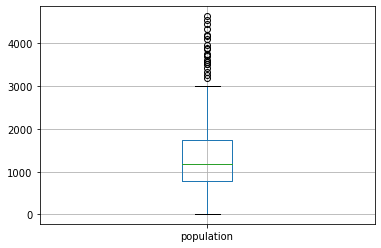

In [29]:
df_oultiers_relajado.boxplot('population')

¿Qué diferencias observas en los resultados para los dos umbrales de tukey? ¿A qué crees que se debe?

* Se han reducido el número de outliers detectados y borrados en el tukey "relajado" con respecto al original.
* En tukey "relajado" al relajar el limite superior debido a que se aplica la fórmula 𝑄3+3×𝐼𝑄𝑅, muchos de los valores que al principio eran detectados como outliers han quedado incluidos por debajo del límite superior.
* Al ser menos los detectados y borrados por el tukey "relajado" y volver a realizar el pintado del boxplot, se siguen apreciando todavía muchos outliers.

Prueba un nuevo método de detección de outliers que encuentres por Internet y compáralo con los anteriores.

In [30]:
#vamos a utilzar el método del z-score
# utilizamos la libreria scipy. En conreto stats.

from scipy import stats
df_outliers_zscore = df[["population"]]
print("INDICES OUTLIERS Z- SCORE : \n\n",list(df_outliers_zscore[(np.abs(stats.zscore(df_outliers_zscore)) >= 3).all(axis=1)].index),"\n")
print("INDICES OUTLIERS RELAJADO: \n\n",outlier_relajado_indices,"\n")
print("INDICES OUTLIERS IQR : \n\n",outlier_indices,"\n")

INDICES OUTLIERS Z- SCORE : 

 [55, 56, 124, 160, 232, 386, 427, 429, 430, 474] 

INDICES OUTLIERS RELAJADO: 

 [55, 56, 124, 137, 160, 232, 386, 427, 429, 430, 474] 

INDICES OUTLIERS IQR : 

 [27, 30, 55, 56, 58, 102, 106, 124, 137, 159, 160, 226, 232, 245, 248, 285, 304, 313, 325, 386, 390, 394, 422, 427, 429, 430, 448, 454, 463, 472, 474] 



***CONCLUSIÓN:***

* Como se aprecia comparandolo con el resto de métodos el de Z-SCORE es el **menos restritivo** de los tres que hemos realizado, detecta casi los mismos que el anterior, no ha detectado el que ocupa la fila 137.

* Por lo tanto este Z-SCORE no es tan eficiente como los anteriores. El siguiente más restrictivo es el que hemos caluclado el limite superior con la formula **𝑄3+3×𝐼𝑄𝑅**. Finalmente el **más restrictivo** y el que detecta más outlierses el de Tukey